# LOADING DATASETS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test = pd.read_csv('test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
#we are creating a new column for both training and test data set so that it will be used while filtering and sampling
train['source'] = 'train'
test['source'] = 'test'

print('shape of train is :',  train.shape , 'shape of test is :', test.shape)

shape of train is : (8523, 13) shape of test is : (5681, 12)


we will 1st concatinating the train and test data and create a merged data frame with all the features
With merged data we will have alot of information and that will be helpful incase of inputing Nan Values
and also help in checking the distribution

In [5]:
data = pd.concat([train,test],ignore_index=True)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [6]:
data.shape

(14204, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [8]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Item_Visibility is showing 0 at min which should be corrected, we will do it later

# UNIVARIATE ANALYSIS

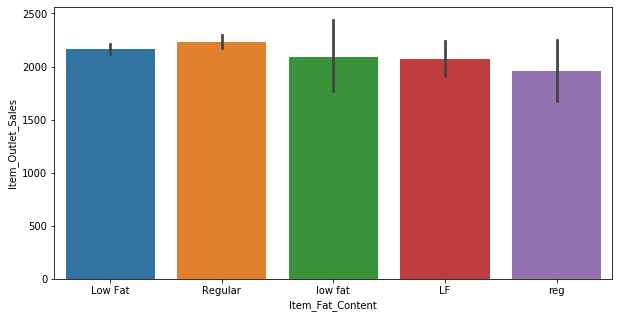

In [9]:
#checking which category of item_fat_content has higher sales
plt.figure(figsize=(10,5))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=data)
plt.show()

#it seems that Thee are only 2 categories for Item_Fat_content, however it is splitted in 5 classes, we will make them 2 classes.

There are 5 classes of Item_Fat_Content, however it can be seen that Low Fat and Regular are in diff form, so we will combine each class of same type

In [10]:
#creating a function which will correct the Item_Fat_Content class attributes
def fun(x):
  if x=='Low Fat' or x=='LF' or x=='low fat':
    return(0)
  else:
    return(1)

In [11]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
data['Item_Fat_Content']=data['Item_Fat_Content'].apply(fun)

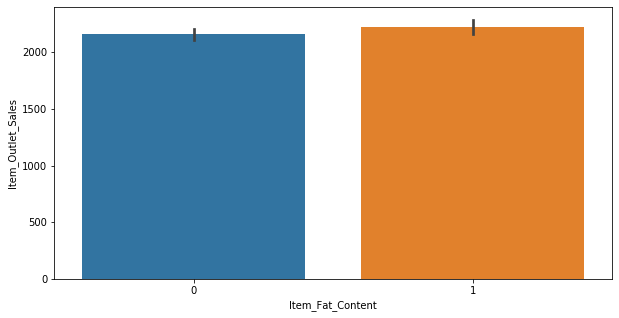

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=data)
plt.show()

Item with Regular Fat is having more sales than of Low Fat

In [14]:
#Item type combine:
#there are 3 types of Item_Identifier which is Food, Drinks, Non consumable, we have categorised all the classes into these 3 classes.
data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

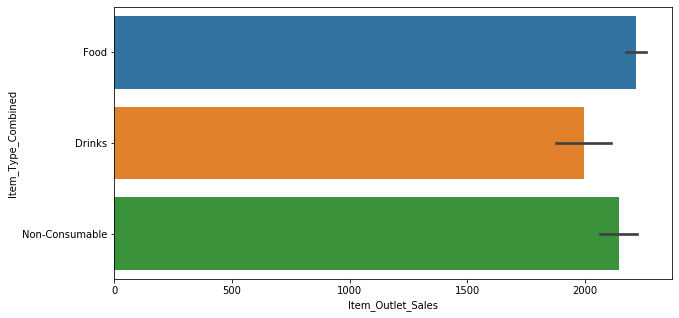

In [15]:
#Sales with relation to the Item_Identifier
plt.figure(figsize=(10,5))
sns.barplot(y='Item_Type_Combined',x='Item_Outlet_Sales',data=data)
plt.show()

The sales of food is the highest and drinks has the lowest.

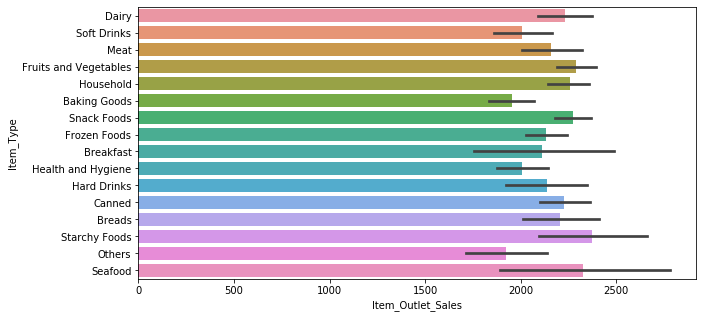

In [16]:
#checking which category of Item_Type has higher sales
plt.figure(figsize=(10,5))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=data)
plt.show()

We can see that softdrinks, Health and Hygine, others and Baking goods shows low sales as compared to othey type of products

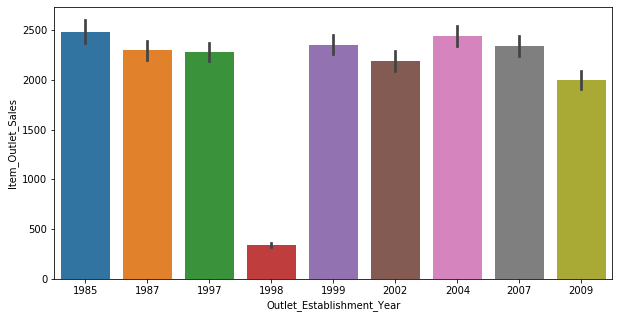

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data)
plt.show()

this shows that in the store which was eastablished 1998 there was huge dip in the sales.

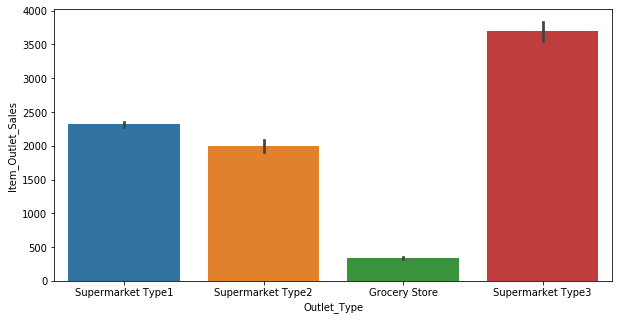

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data)
plt.show()

we can see that the sales in supermarket type3 is the heighest while Grocery store has the lowest

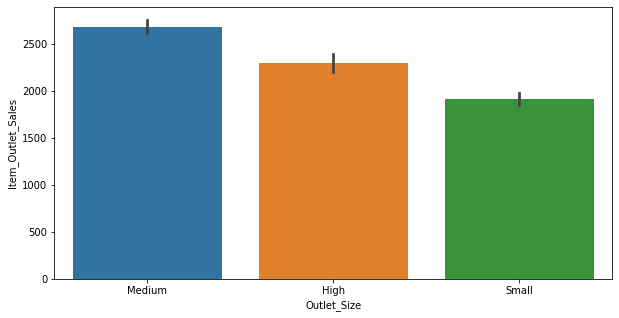

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data)
plt.show()

sales in medium  size outlet is more than High and small size

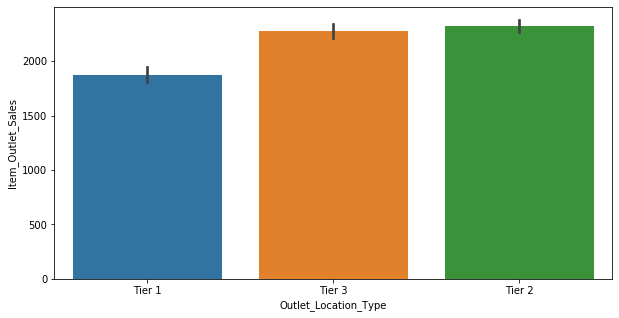

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data)
plt.show()

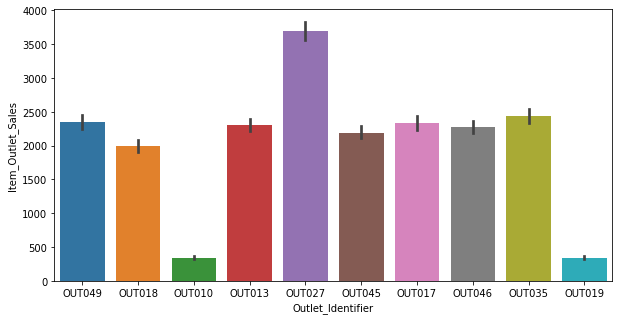

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=data)
plt.show()

Here we can see that the sales in outlet no 27 has the highest sale, where as outlet no 10 and 19 with very less sales

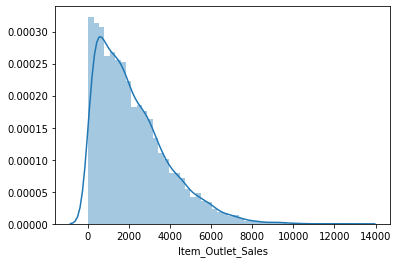

In [22]:
sns.distplot(data['Item_Outlet_Sales'])

the graphs shows that the Item_Outlet_Sales is rightly/ positively skewed.

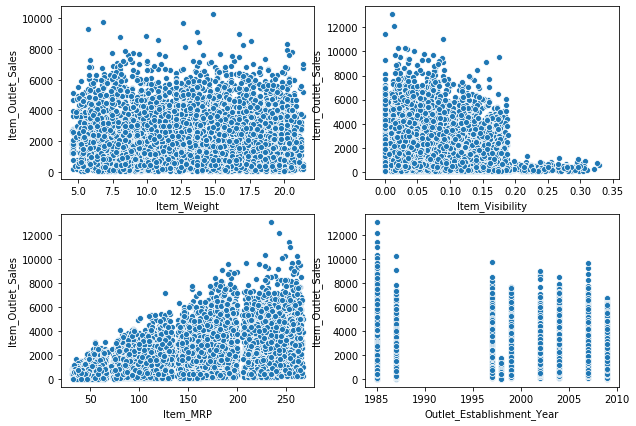

In [23]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,7))
sns.scatterplot(y='Item_Outlet_Sales',x='Item_Weight',data=data,ax=ax[0,0])
sns.scatterplot(y='Item_Outlet_Sales',x='Item_Visibility',data=data,ax=ax[0,1])
sns.scatterplot(y='Item_Outlet_Sales',x='Item_MRP',data=data,ax=ax[1,0])
sns.scatterplot(y='Item_Outlet_Sales',x='Outlet_Establishment_Year',data=data,ax=ax[1,1])
plt.show()

there is a linear relation between ['Item_Weight','Item_MRP','Item_Visibility'] and Item_Outlet_Sales

# Handeling missing values

In [24]:
#total percent of missing value in each attribute
data.isnull().sum()/data.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
Item_Type_Combined            0.000000
dtype: float64

In [25]:
#filling the missing values in Item_Weight with refrence to the classes of Item_Type. 
for var_class in data['Item_Type'].unique():
    data.update(data[data.loc[:,'Item_Type']== var_class]['Item_Weight'].replace(np.nan,data[data.loc[:,'Item_Type']== var_class]['Item_Weight'].mean()))

In [26]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
Item_Type_Combined              0
dtype: int64

In [27]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [28]:
#for filling the nan values in Outlet size

data[data.loc[:,'Outlet_Type']=='Supermarket Type1']['Outlet_Size'].mode()
data.update(data[data.loc[:,'Outlet_Type']=='Supermarket Type1']['Outlet_Size'].replace(np.nan,'Small'))

data[data.loc[:,'Outlet_Type']=='Supermarket Type2']['Outlet_Size'].mode()
data.update(data[data.loc[:,'Outlet_Type']=='Supermarket Type2']['Outlet_Size'].replace(np.nan,'Medium'))

data[data.loc[:,'Outlet_Type']=='Grocery Store']['Outlet_Size'].mode()
data.update(data[data.loc[:,'Outlet_Type']=='Grocery Store']['Outlet_Size'].replace(np.nan,'Small'))

data[data.loc[:,'Outlet_Type']=='Supermarket Type3']['Outlet_Size'].mode()
data.update(data[data.loc[:,'Outlet_Type']=='Supermarket Type3']['Outlet_Size'].replace(np.nan,'Medium'))

In [29]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
Item_Type_Combined              0
dtype: int64

# Multivariate analysis

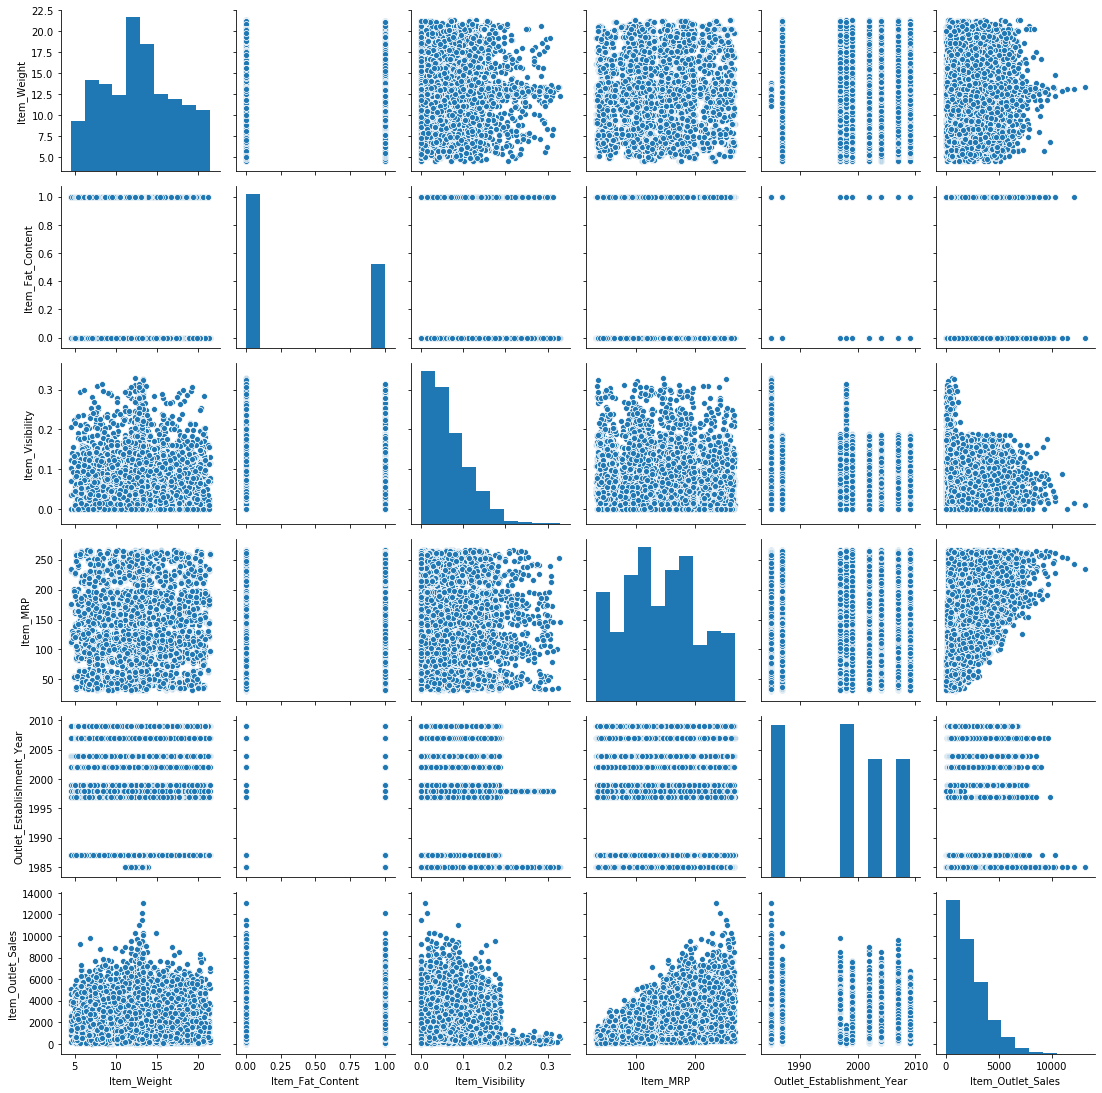

In [30]:
sns.pairplot(data)

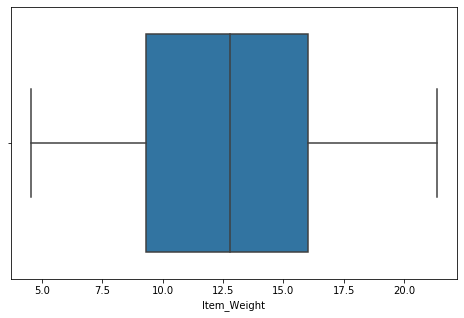

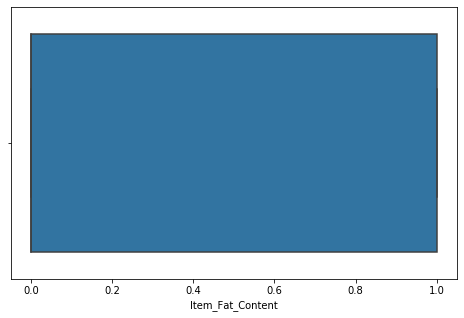

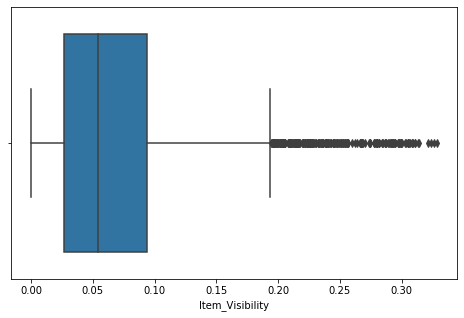

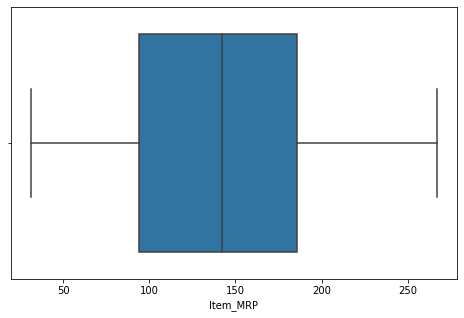

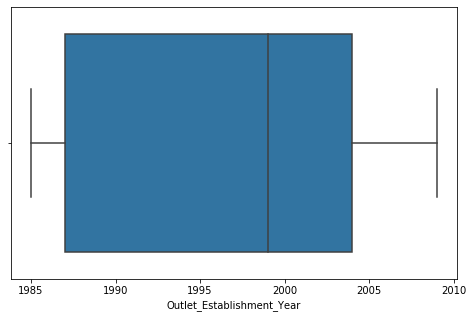

In [31]:
#plotting boxplot
num_var = ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
for i in num_var:
    plt.figure(figsize=(8,5))
    sns.boxplot(data[i])
    plt.show()

Working on Outliers using Z-score but for that 1st we would need to convert the categorical variables into numeric by using label encoder

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
cat_var = data.select_dtypes(include='object')
cat_var.head()

,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Type_Combined
0,FDA15,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train,Food
1,DRC01,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train,Drinks
2,FDN15,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train,Food
3,FDX07,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store,train,Food
4,NCD19,Household,OUT013,High,Tier 3,Supermarket Type1,train,Non-Consumable


In [34]:
for i in cat_var.columns:
    data[i]=le.fit_transform(data[i])

In [35]:
cat_var.head()

,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Type_Combined
0,FDA15,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train,Food
1,DRC01,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train,Drinks
2,FDN15,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train,Food
3,FDX07,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store,train,Food
4,NCD19,Household,OUT013,High,Tier 3,Supermarket Type1,train,Non-Consumable


In [36]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,1,0
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800,1,1
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,1,2


In [37]:
#from scipy.stats import zscore
#z = np.abs(zscore(data))
#z

In [38]:
#threshold = 3
#print(np.where(z>3))

In [39]:
#df1 =data[(z<3).all(axis=1)]
#df1.shape

In [40]:
data.shape

(14204, 14)

In [41]:
#as we can see Item_Visibility's min value is 0 which can not be possible it is not possible that a product gets sold without even looking at it, we need to alter this

data['Item_Visibility'].replace(0.00000,np.nan)
data['Item_Visibility'].fillna(data.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

0        0.016047
1        0.019278
2        0.016760
3        0.000000
4        0.000000
           ...   
14199    0.013496
14200    0.142991
14201    0.073529
14202    0.000000
14203    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

In [42]:
#creating new column which will show the years of the Outlet running

#no of years outlet is working conditon 
data['Outlet_Years']=2020-data['Outlet_Establishment_Year']

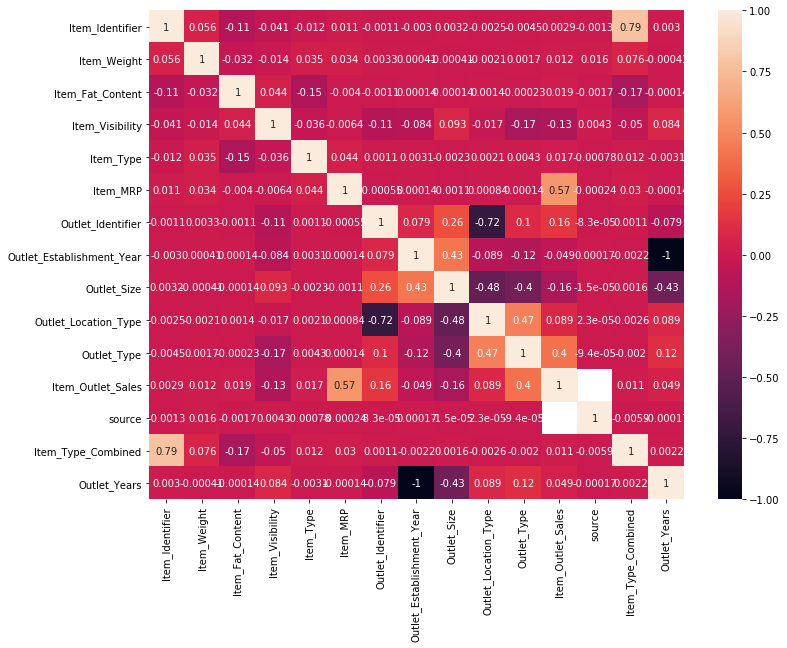

In [43]:
#checking correlation
#correlation heatmap
data_cor = data.corr()

plt.figure(figsize=(12,9))
sns.heatmap(data_cor,annot=True)
plt.show()

In [44]:
#removing Outlet_Eastablishment_Year as it is showing negative correlation
#removing Item_Identifier as it shows very less correlation

data.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],inplace=True)

In [45]:
data.skew()

Item_Weight             0.110306
Item_Fat_Content        0.613645
Item_Visibility         1.195175
Item_Type               0.099574
Item_MRP                0.130728
Outlet_Size            -0.861786
Outlet_Location_Type   -0.209053
Outlet_Type             0.927344
Item_Outlet_Sales       1.177531
source                 -0.408471
Item_Type_Combined      0.117284
Outlet_Years            0.396465
dtype: float64

In [46]:
for col in data.columns:
    if col != 'Item_Outlet_Sales':
        if data.skew().loc[col]>0.55:
            data[col]=np.log1p(data[col])

In [47]:
data.skew()

Item_Weight             0.110306
Item_Fat_Content        0.613645
Item_Visibility         1.038885
Item_Type               0.099574
Item_MRP                0.130728
Outlet_Size            -0.861786
Outlet_Location_Type   -0.209053
Outlet_Type            -0.235873
Item_Outlet_Sales       1.177531
source                 -0.408471
Item_Type_Combined      0.117284
Outlet_Years            0.396465
dtype: float64

In [48]:
#splitting data into train and test

In [49]:
train = data[data.loc[:,'source']==1]
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Outlet_Years
0,9.30,0.000000,0.015920,4,249.8092,1,0,0.693147,3735.1380,1,1,21
1,5.92,0.693147,0.019095,14,48.2692,1,2,1.098612,443.4228,1,0,11
2,17.50,0.000000,0.016621,10,141.6180,1,0,0.693147,2097.2700,1,1,21
3,19.20,0.693147,0.000000,6,182.0950,2,2,0.000000,732.3800,1,1,22
4,8.93,0.000000,0.000000,9,53.8614,0,2,0.693147,994.7052,1,2,33


In [50]:
train.drop('source',axis=1,inplace=True)
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,9.30,0.000000,0.015920,4,249.8092,1,0,0.693147,3735.1380,1,21
1,5.92,0.693147,0.019095,14,48.2692,1,2,1.098612,443.4228,0,11
2,17.50,0.000000,0.016621,10,141.6180,1,0,0.693147,2097.2700,1,21
3,19.20,0.693147,0.000000,6,182.0950,2,2,0.000000,732.3800,1,22
4,8.93,0.000000,0.000000,9,53.8614,0,2,0.693147,994.7052,2,33


In [51]:
test = data[data.loc[:,'source']==0]
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Outlet_Years
8523,20.750000,0.000000,0.007536,13,107.8622,1,0,0.693147,NaN,0,1,21
8524,8.300000,0.693147,0.037708,4,87.3198,2,1,0.693147,NaN,0,1,13
8525,14.600000,0.000000,0.094924,11,241.7538,2,2,0.000000,NaN,0,2,22
8526,7.315000,0.000000,0.015271,13,155.0340,2,1,0.693147,NaN,0,1,13
8527,13.238358,0.693147,0.112077,4,234.2300,1,2,1.386294,NaN,0,1,35


In [52]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet_Years
8523,20.750000,0.000000,0.007536,13,107.8622,1,0,0.693147,1,21
8524,8.300000,0.693147,0.037708,4,87.3198,2,1,0.693147,1,13
8525,14.600000,0.000000,0.094924,11,241.7538,2,2,0.000000,2,22
8526,7.315000,0.000000,0.015271,13,155.0340,2,1,0.693147,1,13
8527,13.238358,0.693147,0.112077,4,234.2300,1,2,1.386294,1,35


In [53]:
#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

# model fitting

In [54]:
train = pd.read_csv('train_modified.csv')
test = pd.read_csv('test_modified.csv')

In [56]:
#now we will split the train and test data set into x_train, y_train and x_test , y_test respectively.
#we will train the "train" data for our prediction of "test" data.
#I will be using Random forest regressor as that model gave me the best r2 score.
#that can be checked on my github repository , file names as "bigmart train.ipynb"


x_train = train.drop('Item_Outlet_Sales',axis=1)
x_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet_Years
0,9.30,0.000000,0.015920,4,249.8092,1,0,0.693147,1,21
1,5.92,0.693147,0.019095,14,48.2692,1,2,1.098612,0,11
2,17.50,0.000000,0.016621,10,141.6180,1,0,0.693147,1,21
3,19.20,0.693147,0.000000,6,182.0950,2,2,0.000000,1,22
4,8.93,0.000000,0.000000,9,53.8614,0,2,0.693147,2,33


In [57]:
y_train= train['Item_Outlet_Sales']
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [59]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [60]:
#now we will run the prediction.

rfr.predict(test)

array([1810.636442, 1409.618444,  778.033906, ..., 1897.603238,
       4859.421196, 1583.112608])

In [61]:
#saving the model
from sklearn.externals import joblib
joblib.dump(rfr.predict,'BIGMART.pkl')

['BIGMART.pkl']